# Initial model
Simulation of random map with $n=1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tk
from statsmodels.distributions.empirical_distribution import ECDF

from scipy.stats import ks_2samp
import scipy.stats as sc
from scipy.special import kl_div

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 20})

---
### 1. Paramters

In [2]:
Niter = int(1e6)
a0 = 2
var = .8
z0 = 1

n = 1

---
### 2. Simulation

In [3]:
beta = np.random.randn(Niter)
beta = np.sqrt(var)*beta

def controller_MLE(t,c_,z_,n=1):
    '''
    MLE estimator for one step lookback, as derived in Eurich and Pawelzik.
    Returns c_t = c_{t-1} + z_t/z_{t-1}
    '''
    if t<n:
        ct = np.sum( (c_[0:t]*(z_[0:t]**2)+z_[0:t]*z_[1:t+1])) / np.sum((z_[0:t]**2))
        #ct = 0#c_[t-1] + z[t]/z[t-1]
    else:
        ct = np.sum( (c_[t-n:t]*(z_[t-n:t]**2)+z_[t-n:t]*z_[t-n+1:t+1])) / np.sum((z_[t-n:t]**2) )
    return ct


z = np.zeros(Niter)
z[0] = z0
z[1] = a0*z[0] + beta[0]

c = np.zeros(Niter)
c[0] = 0
c[1] = z[1]

z[2] = (a0-c[1])*z[1] + beta[1]

for t in range(2,Niter-1):
    z[t+1]=z[t]*(a0-c[t])+beta[t]
    c[t+1]=controller_MLE(t,c,z,n) 
    
#np.savetxt("Data/n=1.csv",z, delimiter=" ")

In [4]:
#z = np.loadtxt("Data/n=1.csv")

---
### 2. Analysis

In [4]:
print( "<z> = {:.2e}".format(np.mean(z)) )

<z> = 2.89e-01


In [5]:
print("max(z)={:.2e}".format(np.max((z))))

max(z)=2.16e+05


#### 4. Quantiles

In [6]:
p = np.linspace(0.6,0.9,10000)
q = np.quantile(np.abs(z),p)

mn = np.sqrt(var*2*np.log(Niter)) # maximum of Gaussian equivalent sequence

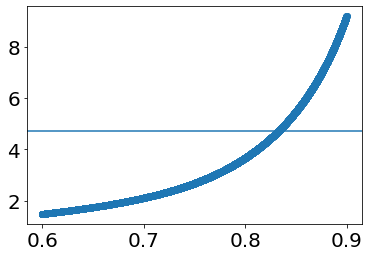

In [8]:
plt.plot(p,q,'o')
plt.axhline(mn);

In [9]:
print('{:.2%}'.format(p[np.argmin((q-mn)**2)]))

83.26%


#### 3. CCDF

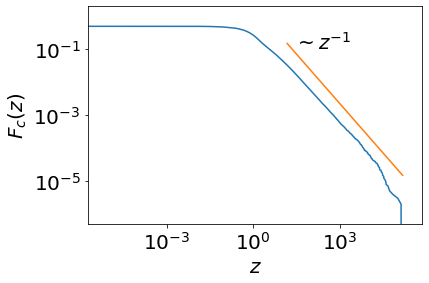

In [10]:
 ecdf = ECDF(z)    
# plot the ccd
plt.plot(ecdf.x, 1-ecdf.y,label='n=1');
plt.plot([1.5e1,1.5e5],[1.5e-1, 1.5e-5],label=r'$\delta_{CCDF}=1$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$F_c(z)$')
plt.xlabel(r'$z$');
#plt.legend();
#plt.text(1.5e3,.8e-2,r'$\sim z^{-1}$');
plt.text(2.5e1,1e-1,r'$\sim z^{-1}$');
#plt.text(2e4,1.5e-4,r'$\sim z^{-1}$');

#tk.clean_figure()
#tk.save('GraphsR5/ccdf_n=1.tex')

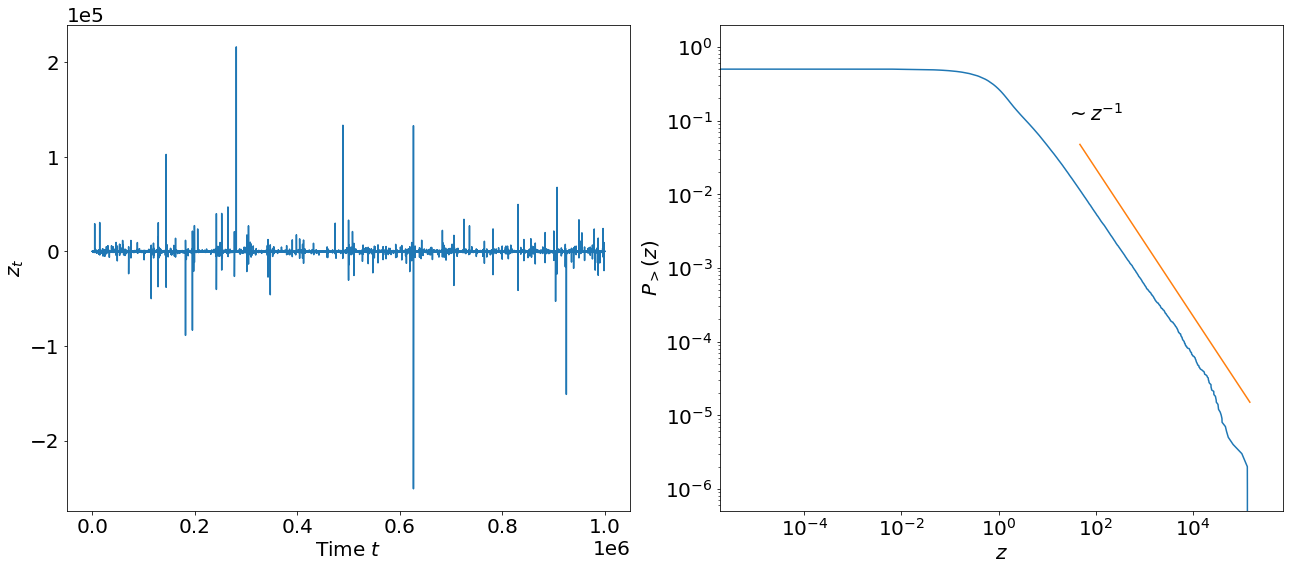

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,8))


axes[0].plot(z)
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('$z_t$')
#axes[0].set_yticks([0, .2e7, .4e7, .6e7, .80e7, 1.0e7])
axes[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#axes[0].yaxis._update_offset_text_position = types.MethodType(bottom_offset, axes[0].yaxis)
#axes[0].set_ylim([-1e6,1e6])


axes[1].plot(ecdf.x, 1-ecdf.y,label='n=1');
axes[1].plot([1.5*10**1.5,1.5e5],[1.5*10**-1.5, 1.5e-5],label=r'$\delta_{CCDF}=1$')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_ylabel(r'$P_>(z)$',fontsize=20)
axes[1].set_xlabel(r'$z$');
axes[1].tick_params(axis='y', which='major', labelsize=20)
axes[1].text(2.5e1,1e-1,r'$\sim z^{-1}$');


plt.tight_layout(pad=.5);
#plt.savefig('GraphsR5/dist_n=1.pdf')